In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Предобработка данных в соответсвии с прошлой работой

In [2]:
df = pd.read_csv('C:/Users/User/OneDrive/Documents/car_price_prediction.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df_dropped = df.drop('Car_Name', axis=1)

df_dropped.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_dropped['Current_age'] = 2024 - df_dropped['Year']
df_dropped = df_dropped.drop('Year', axis=1)

df_dropped.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [5]:
df_dummies=pd.get_dummies(df_dropped, drop_first=True)

df_dummies.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


# Train-Test Split

In [6]:
X = df_dummies.drop("Selling_Price", axis = 1)

y = df_dummies['Selling_Price']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Выбор более сложной ML-модели 

В качестве более сложной модели будет использоваться RandomForestRegressor, основанный на ансамблевом методе, известном как случайный лес. Модель комбинирует прогнозы нескольких деревьев решений для улучшения своей общей производительности. Также RandomForestRegressor предоставляет оценки важности признаков, что позволяет проанализировать, какие переменные вносят наибольший вклад в предсказания.

In [10]:
model = RandomForestRegressor()

Определение параметров для перебора:

In [11]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_


print("Лучшие параметры:", best_params)

Лучшие параметры: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
best_model = RandomForestRegressor(**best_params)
best_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=200)

In [17]:
y_pred = best_model.predict(x_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)

MAE: 0.6219926229508194
R2 Score: 0.9225252340056005


Можно заметить, что после применения более сложной модели и подбора гиперпараметров качество предсказаний улучшилось. При использовании модели линейной регресии MAE составляла 1.294498741010437, а R2 Score - 0.8436773164235075.

# Интерпретация полученной модели

RandomForestRegressor не предоставляет прямые коэффициенты, как линейные модели, вследствие чего невозможно провести интерпретацию на основе значений коэффициентов. 

Важность признаков:

In [37]:
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
fig1 = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h', title='Важность признаков')
fig1.update_layout(xaxis_title='Важность', yaxis_title='Признак', yaxis_categoryorder='total ascending')

fig1.show()

fig1.write_html('feature_importance_plot.html')

Самой большой важностью среди признаков обладает текущая стоимоть машины (0.869), являющаяся целевой переменной. Также наибольшей важностью среди остальных обладают признаки, связанные с возрастом машины (0.087) и ее пробегом (0.025).

Перестановочная важность:

In [38]:
fig2 = go.Figure()

fig2.add_trace(go.Bar(
    y=x_test.columns[sorted_idx],
    x=perm_importance.importances_mean[sorted_idx],
    orientation='h',
    text=perm_importance.importances_mean[sorted_idx],
    textposition='outside',
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1)
    ),
))

fig2.update_layout(
    title='Перестановочная важность',
    xaxis_title='Важность',
    yaxis_title='признак',
    yaxis_categoryorder='total ascending',
)

fig2.show()

fig.write_html('perm_importance_plot.html')

Наибольшим значением обладает текущая стоимость машины, а также ее пробег. Соответственно, при перемешивании перечисленных ранее признаков качество работы модели сильно ухудшается.

Частичные зависимости:

In [35]:
!pip install shap

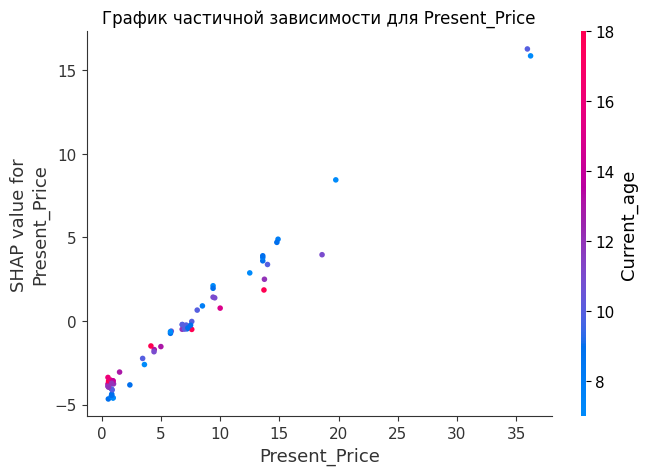

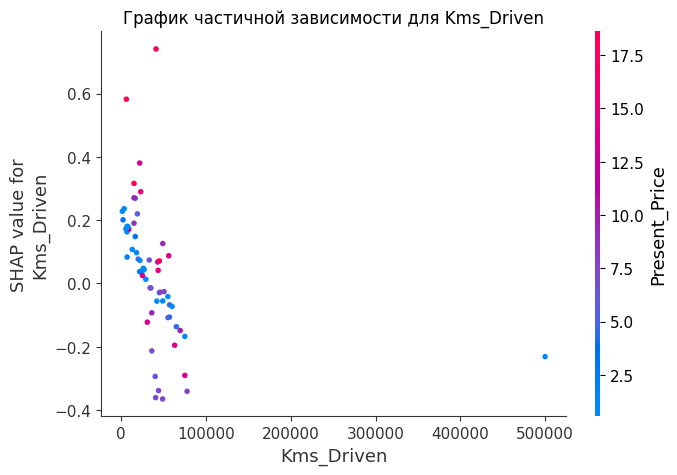

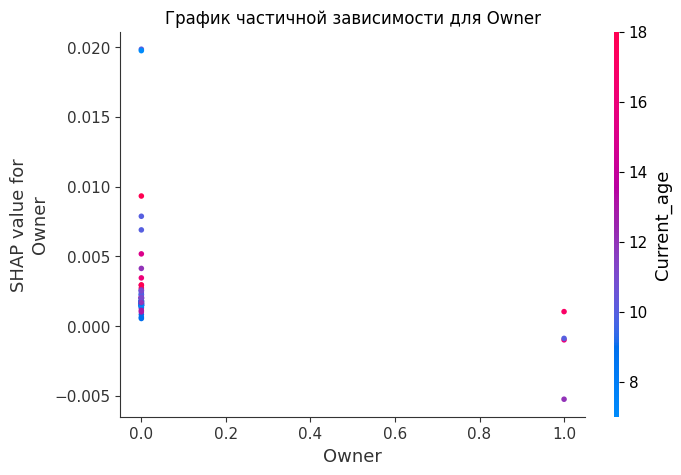

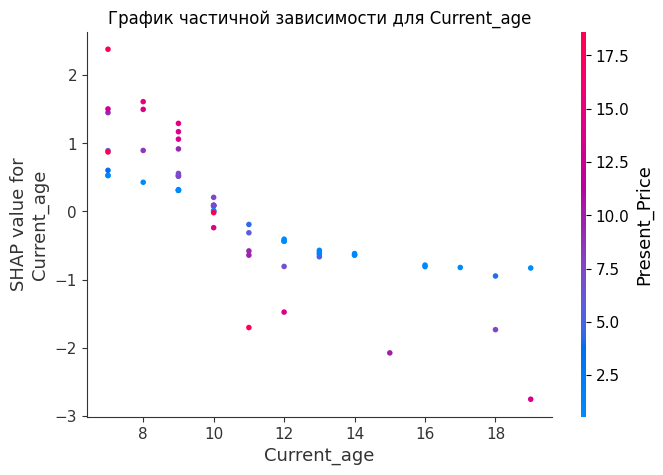

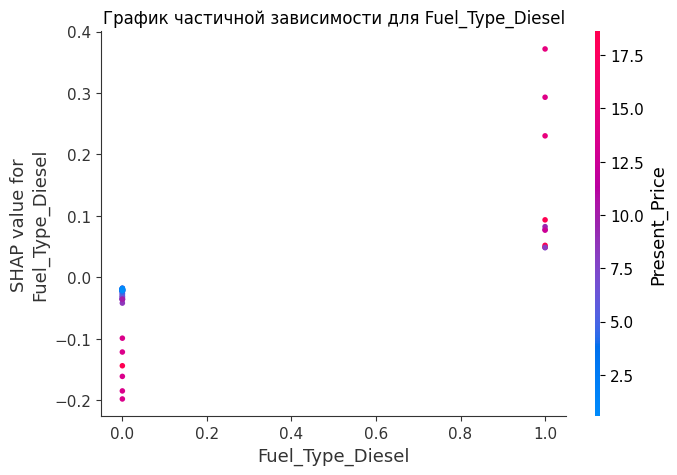

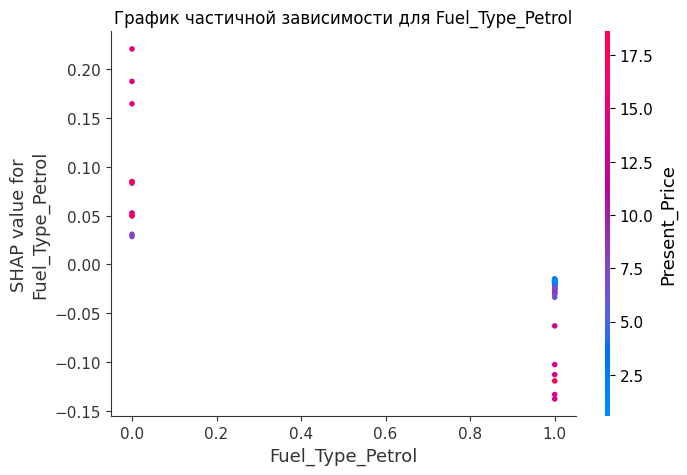

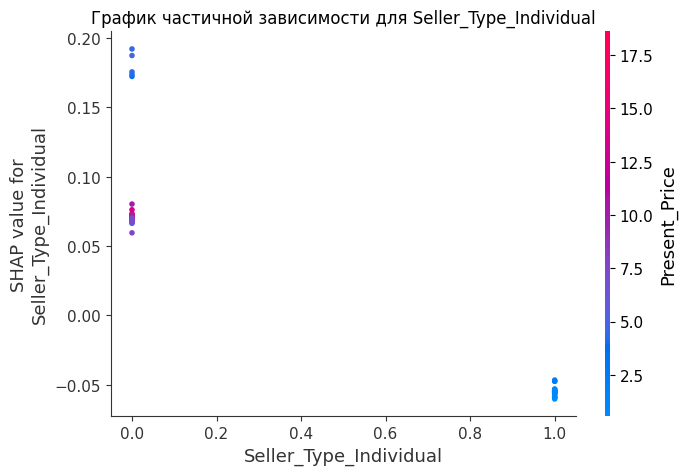

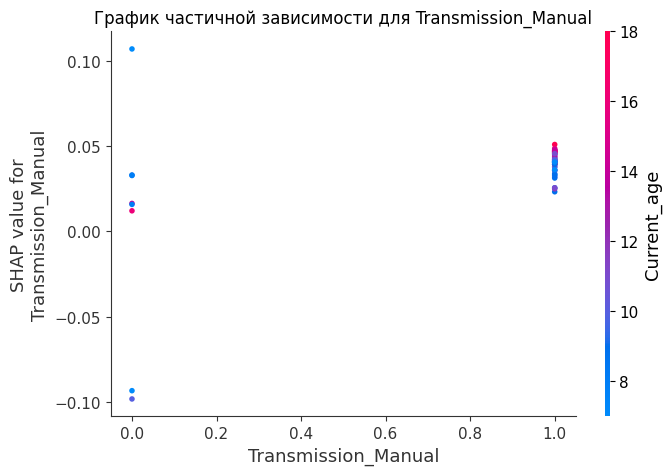

In [41]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)

for feature_name in x_test.columns:
    shap.dependence_plot(feature_name, shap_values, x_test, interaction_index="auto", show=False, display_features=x_test)
    plt.title(f'График частичной зависимости для {feature_name}')
    plt.savefig(f'feature_importance_for_{feature_name}.png')  # Сохранение в формате изображения
    plt.show()

По полученным интерпретациям можно заметить, что самым важным признаком является целевая переменная. Это можно объяснить тем, что именно её модель пытается предсказать или объяснить. При обучении она анализирует взаимосвязи между признаками (независимыми переменными) и целевой переменной (зависимой переменной), вследствие чего выявляется множество закономерностей в данных, которые помогают делать ей точные предсказания относительно целевой переменной на новых данных. Также немалую важность имеют такие признаки, как пробег машины и ее возраст. Эти параметры способны определять состояние автомобиля: его износ и надежность. Чем старше автомобиль или чем больше его пробег, тем больше вероятность, что ему может потребоваться более частое и дорогое техническое обслуживание. Это, в свою очередь, способно сильно отражаться на стоимости.